# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD25"
COLLABORATORS = "Adam Lewiński 407657, Małgorzata Serwańska 405044"

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku eruption_data.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
# YOUR CODE HERE
eruptions_data = pd.read_csv("eruption_data.csv", index_col = "Eruption Number")
print(eruptions_data)

                        Volcano Name Eruption Category  VEI  Start Year  \
Eruption Number                                                           
22486                       Cotopaxi         Confirmed    2        2022   
22481                           Taal         Confirmed    1        2022   
22458                      Turrialba         Confirmed    1        2022   
22453                         Ulawun         Confirmed    2        2022   
22454                          Raung         Confirmed    2        2022   
...                              ...               ...  ...         ...   
14556                      Tongariro         Confirmed    5       -9650   
21101            Craters of the Moon         Confirmed    0      -10060   
22141                   Igwisi Hills         Confirmed    1      -10450   
22351                   Quetrupillan         Confirmed    3      -10658   
22352                   Quetrupillan         Confirmed    3      -11345   

                 Start M

### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny: </br>
- Nagłówki 1 poziomu:
    - Eruption category - All, Confirmed Eruption, Uncertain Eruption
- Nagłówki 2 poziomu (dla każdego z nagłówków 1 poziomu ten sam zestaw kolumn):
    - f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
    - cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
    - rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
    - crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [5]:
##### YOUR CODE HERE
vei_data_1 = eruptions_data[["VEI", "Eruption Category"]]
vei_data_1 = vei_data_1.groupby("VEI").count()
cf = []
for index, row in vei_data_1.iterrows():
    try:
        cf.append(cf[-1]+row["Eruption Category"])
    except:
        cf.append(row["Eruption Category"])
vei_data_1["2"] = cf
vei_data_1["3"] = vei_data_1["Eruption Category"]/np.sum(vei_data_1["Eruption Category"])
vei_data_1["4"] = vei_data_1["2"]/np.sum(vei_data_1["Eruption Category"])
vei_data_1.columns = ["f","cf","rf","crf"]

vei_data_2 = eruptions_data[eruptions_data["Eruption Category"] == "Confirmed"][["VEI", "Eruption Category"]]
vei_data_2 = vei_data_2.groupby("VEI").count()
cf = []
for index, row in vei_data_2.iterrows():
    try:
        cf.append(cf[-1]+row["Eruption Category"])
    except:
        cf.append(row["Eruption Category"])
vei_data_2["2"] = cf
vei_data_2["3"] = vei_data_2["Eruption Category"]/np.sum(vei_data_2["Eruption Category"])
vei_data_2["4"] = vei_data_2["2"]/np.sum(vei_data_2["Eruption Category"])
vei_data_2.columns = ["f","cf","rf","crf"]

vei_data_3 = eruptions_data[eruptions_data["Eruption Category"] == "Uncertain"][["VEI", "Eruption Category"]]
vei_data_3 = vei_data_3.groupby("VEI").count()
cf = []
for index, row in vei_data_3.iterrows():
    try:
        cf.append(cf[-1]+row["Eruption Category"])
    except:
        cf.append(row["Eruption Category"])
vei_data_3["2"] = cf
vei_data_3["3"] = vei_data_3["Eruption Category"]/np.sum(vei_data_3["Eruption Category"])
vei_data_3["4"] = vei_data_3["2"]/np.sum(vei_data_3["Eruption Category"])
vei_data_3.columns = ["f","cf","rf","crf"]
vei_data = pd.concat([vei_data_1, vei_data_2, vei_data_3], axis=1, keys=['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])

## Uważam, że ten kod mógłby być dodany, ale nie przechodzi testów
vei_data[[("Uncertain Eruptions", "f"), ("Uncertain Eruptions", "rf")]] = vei_data[[("Uncertain Eruptions", "f"), ("Uncertain Eruptions", "rf")]].fillna(0)
vei_data[("Uncertain Eruptions", "crf")] = vei_data[("Uncertain Eruptions", "crf")] .fillna(1)
vei_data[("Uncertain Eruptions", "cf")] = vei_data[("Uncertain Eruptions", "cf")] .fillna(max(vei_data[("Uncertain Eruptions", "cf")]))

df_styled = vei_data.style.format(precision=0).format(subset=[("All eruptions","rf"), ("All eruptions","crf"), ("Confirmed Eruptions","rf"), ("Confirmed Eruptions","crf"), ("Uncertain Eruptions","rf"), ("Uncertain Eruptions","crf")], precision=4)
dfi.export(df_styled, 'veiData.png')
display(df_styled)

error: unknown flag `disable-gpu'


CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--no-sandbox', '--crash-dumps-dir=/tmp', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/tmp/tmpejjkqc97/temp.png', '/tmp/tmpejjkqc97/temp.html']' returned non-zero exit status 64.

In [ ]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

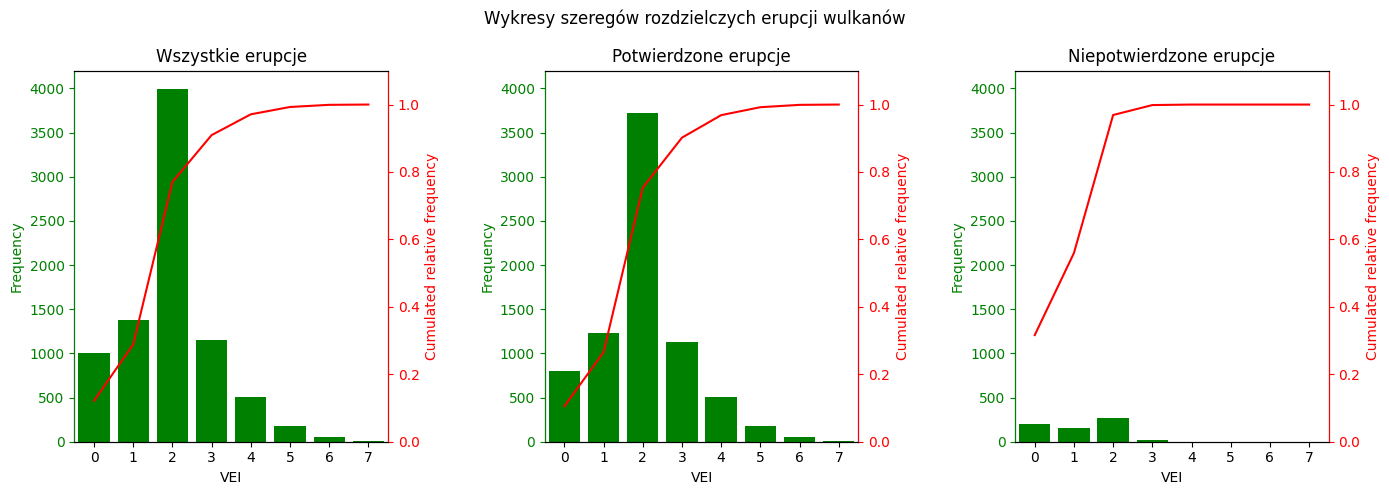

In [6]:
# YOUR CODE HERE
# YOUR CODE HERE
fig, ax = plt.subplots(1,3,figsize=(14,5), facecolor="white")
ax[0].bar(vei_data.index, vei_data["All eruptions"].f, color = "green")
ax[0].set_ylabel("Frequency")
ax[0].set_ylim([0,4200])
ax[0].yaxis.label.set_color('green')
ax[0].tick_params(axis='y', colors='green')
ax[0].set_xlabel("VEI")
ax[0].set_xticks(range(0,8))
ax[0].set_facecolor("white")
ax[0] = ax[0].twinx()
ax[0].set_ylabel("Cumulated relative frequency")
ax[0].set_ylim([0,1.1])
ax[0].yaxis.label.set_color('red')
ax[0].tick_params(axis='y', colors='red')
ax[0].plot(vei_data.index, vei_data["All eruptions"].crf, c="red")
ax[0].spines['left'].set_color('green')
ax[0].spines['right'].set_color('red')
ax[0].set_title("Wszystkie erupcje")
ax[0].set_xlim([-0.5,7.5])


ax[1].bar(vei_data.index, vei_data["Confirmed Eruptions"].f, color = "green")
ax[1].set_ylabel("Frequency")
ax[1].set_ylim([0,4200])
ax[1].yaxis.label.set_color('green')
ax[1].tick_params(axis='y', colors='green')
ax[1].set_xlabel("VEI")
ax[1].set_xticks(range(0,8))
ax[1].set_facecolor("white")
ax[1] = ax[1].twinx()
ax[1].set_ylabel("Cumulated relative frequency")
ax[1].set_ylim([0,1.1])
ax[1].yaxis.label.set_color('red')
ax[1].tick_params(axis='y', colors='red')
ax[1].plot(vei_data.index, vei_data["Confirmed Eruptions"].crf, c="red")
ax[1].spines['left'].set_color('green')
ax[1].spines['right'].set_color('red')
ax[1].set_title("Potwierdzone erupcje")
ax[1].set_xlim([-0.5,7.5])


ax[2].bar(vei_data.index, vei_data["Uncertain Eruptions"].f, color = "green")
ax[2].set_ylabel("Frequency")
ax[2].set_ylim([0,4200])
ax[2].yaxis.label.set_color('green')
ax[2].tick_params(axis='y', colors='green')
ax[2].set_xlabel("VEI")
ax[2].set_xticks(range(0,8))
ax[2].set_facecolor("white")
ax[2] = ax[2].twinx()
ax[2].set_ylabel("Cumulated relative frequency")
ax[2].set_ylim([0,1.1])
ax[2].yaxis.label.set_color('red')
ax[2].tick_params(axis='y', colors='red')
ax[2].plot(vei_data.index, vei_data["Uncertain Eruptions"].crf, c="red")
ax[2].spines['left'].set_color('green')
ax[2].spines['right'].set_color('red')
ax[2].set_title("Niepotwierdzone erupcje")
ax[2].set_xlim([-0.5,7.5])

fig.suptitle("Wykresy szeregów rozdzielczych erupcji wulkanów")
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.savefig("veiFrequencyPlo.png")

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

Indeks:
- Nagłówki 1 poziomu
    - kategoria dowodów
- Nagłówki 2 poziomu:
    - metoda, która dostarczyła dowodów

Kolumny: </br>
- VEI - wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [19]:
# YOUR CODE HERE
minimum = min(eruptions_data["VEI"])
maximum = max(eruptions_data["VEI"])
evidence_data = pd.DataFrame()
evidence_data["All"] = eruptions_data.groupby(["Evidence Type", "Evidence Method"]).size()
for i in range(minimum, maximum+1):
    evidence_data[i] = eruptions_data[eruptions_data["VEI"] == i].groupby(["Evidence Type", "Evidence Method"]).VEI.count()
    pass
allCol = evidence_data.All
evidence_data.drop("All", axis=1, inplace=True)
evidence_data["All"] = allCol
evidence_data.fillna(0, inplace=True)
help(dfi.export)
df_styled = evidence_data.style.format(precision=0)
dfi.export(df_styled, 'evidenceType-evidenceMethod.png')
display(df_styled)

Help on function export in module dataframe_image._pandas_accessor:

export(obj, filename, fontsize=14, max_rows=None, max_cols=None, table_conversion='chrome', chrome_path=None, dpi=None)
    Export a styled DataFrame as png to a file
    
    Parameters
    ----------
    filename : str or file-like
        The file location where the image will be saved. Provide a string 
        to specify a file location on your local machine or a file-like object 
        that has a `write` method.
    
    fontsize : int
        Font size in points
    
    max_rows : int
        Maximum number of rows to output from DataFrame. This number is passed
        to the `to_html` DataFrame method.
    
        To prevent accidentally creating images with large numbers of rows,
        an error will be raised for DataFrames with more than 100 rows.
        Set this parameter explicitly to override this error. Use -1 for all rows.
    
    max_cols : int
        Maximum number of rows to output from Dat

error: unknown flag `disable-gpu'


CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--no-sandbox', '--crash-dumps-dir=/tmp', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/tmp/tmp1n8gb18y/temp.png', '/tmp/tmp1n8gb18y/temp.html']' returned non-zero exit status 64.

In [ ]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

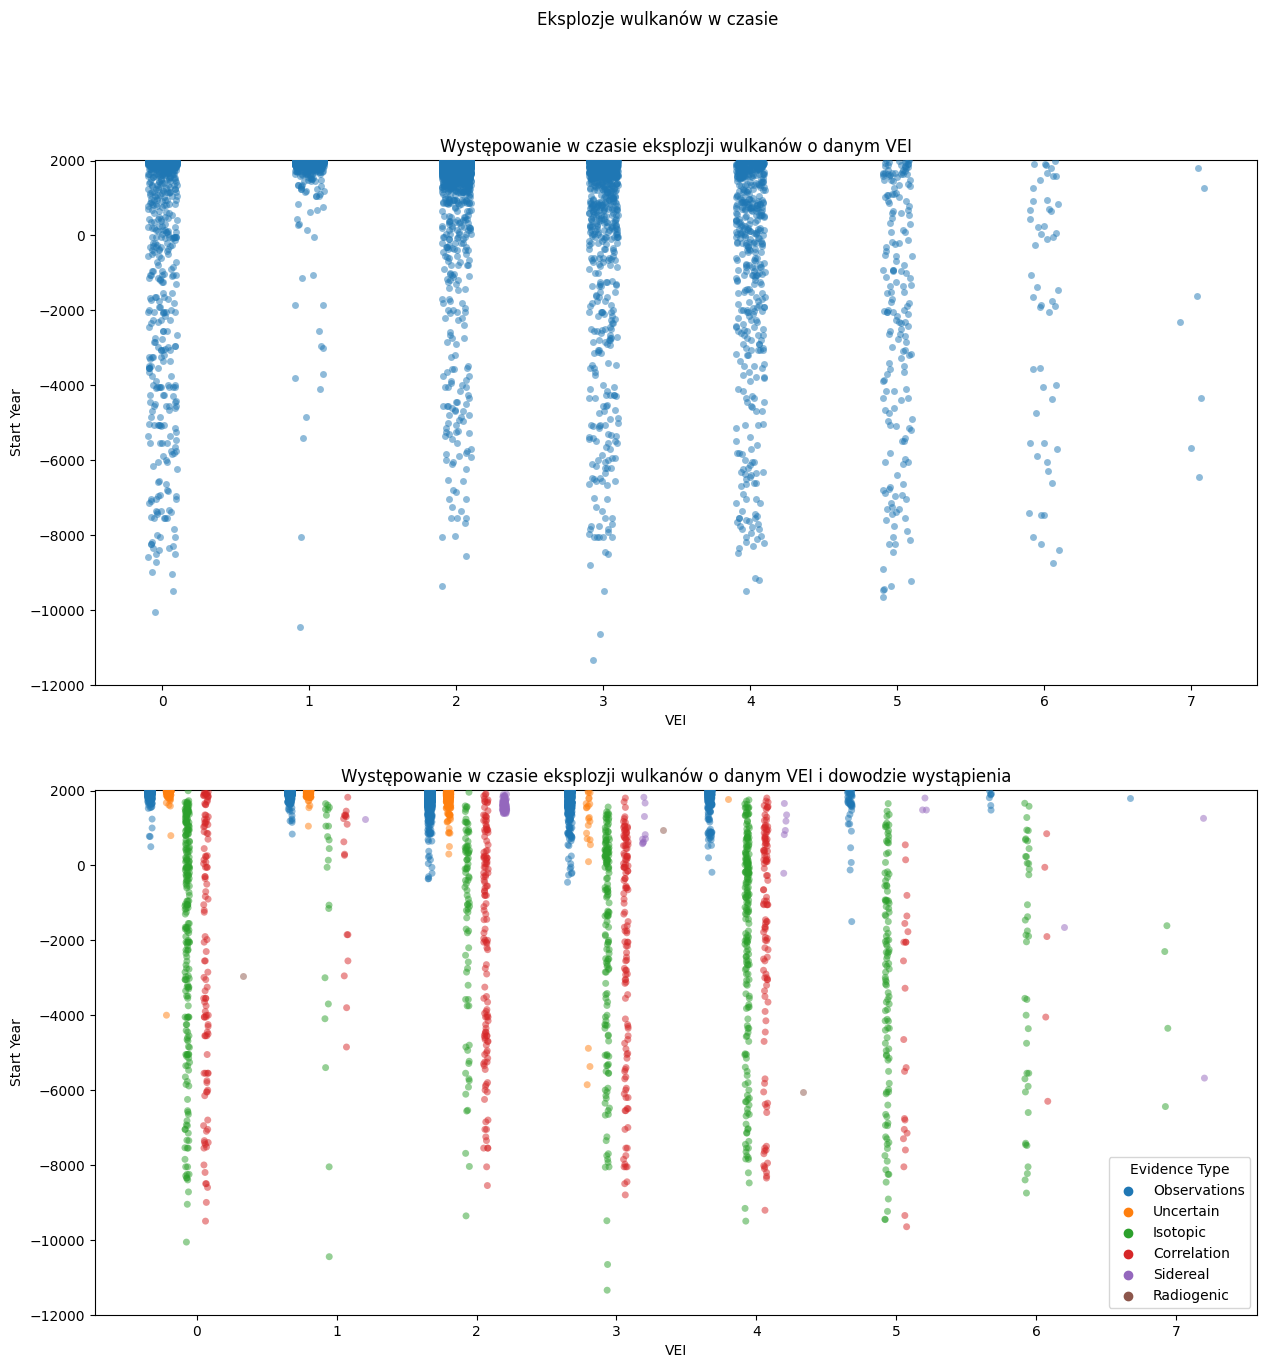

In [15]:
# YOUR CODE HERE
fig, ax = plt.subplots(2,1,figsize=(15,15), facecolor="white")

ax[0].set_facecolor("white")
g = sns.stripplot(data = eruptions_data, x = "VEI", y = "Start Year", ax = ax[0], alpha = 0.5, native_scale=True)
#g.set_xticks(np.linspace(ax[0].get_xlim()[0],ax[0].get_xlim()[1],10)) # <--- set the ticks first
#g.set_xticklabels(np.linspace(min(eruptions_data["Start Year"]), max(eruptions_data["Start Year"]), 10, dtype=int ))
ax[0].set_title("Występowanie w czasie eksplozji wulkanów o danym VEI")
ax[0].set_ylim([-12000,2022])


ax[1].set_facecolor("white")
g = sns.stripplot(data = eruptions_data, x = "VEI", y = "Start Year", ax = ax[1], hue="Evidence Type", dodge=True, alpha=0.5, native_scale=True)
#g.set_xticks(np.linspace(ax[1].get_xlim()[0],ax[1].get_xlim()[1],10)) # <--- set the ticks first
#g.set_xticklabels(np.linspace(min(eruptions_data["Start Year"]), max(eruptions_data["Start Year"]), 10, dtype=int ))
ax[1].set_ylim([-12000,2022])
ax[1].set_title("Występowanie w czasie eksplozji wulkanów o danym VEI i dowodzie wystąpienia")
ax[1].legend(title="Evidence Type", loc='lower right')

fig.suptitle("Eksplozje wulkanów w czasie")
fig.savefig("timeSeriesExplosion.png")